# Exercice I. Introduction to C-SVM

For illustrating kernel methods in general and for Support Vector Machines in particular, we consider a very simple classification problem. Let assume that the data is describe in a 1D space divided into two classes ($+1$ and $-1$) as follows:

\begin{equation*}
\mathcal{S} = \{(\mathbf{x}_1 = 1, y_1 = 1), (\mathbf{x}_2 = 2, y_2 = 1), (\mathbf{x}_3 = 4, y_3 = -1), 
(\mathbf{x}_4 = 5, y_4 = -1), (\mathbf{x}_5 = 6, y_5 = 1)\}
\end{equation*}

The following script is used for visualizing the data.

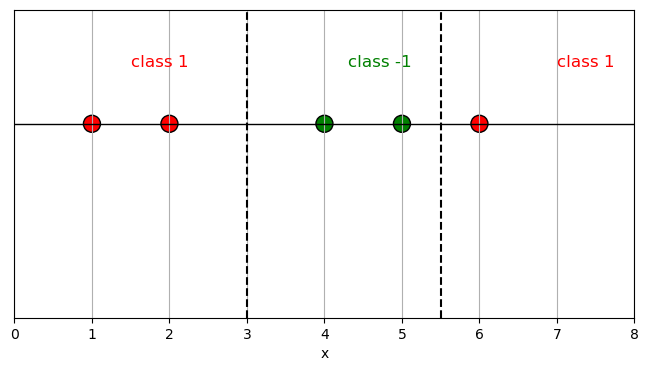

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.array([1, 2, 4, 5, 6])
class_labels = np.array([1, 1, 2, 2, 1])
y = class_labels - 3 + 3 *(class_labels == 1)

# Set up the plot
_, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, np.zeros_like(x), 
            c=np.where(class_labels == 1, 'red', 'green'), 
            s=150, 
            edgecolors='black', 
            marker='o')

ax.set_ylim(-1.7, 1)
ax.set_xlim(0, 8)
ax.set_xlabel('x')
ax.set_yticks([])

# Add text annotations
ax.text(1.5, 0.5, 'class 1', color='red', fontsize=12)
ax.text(4.3, 0.5, 'class -1', color='green', fontsize=12)
ax.text(7, 0.5, 'class 1', color='red', fontsize=12)

# Add grid
ax.grid(True)

# Add horizontal and vertical lines
ax.axhline(0, color='black', linewidth=1)
ax.axvline(3, color='black', linestyle='--')
ax.axvline(5.5, color='black', linestyle='--')

# Show the plot
plt.show()

Of course, linear boundary can't discriminate the two classes and we propose 
to train a nonlinear SVM classifier combined with a second order polynomial 
kernel defined as: 

install.packages("kernlab")
\begin{equation*}
k(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x_1}^\top \mathbf{x}_2+1)^2. 
\end{equation*}

## Question 1.
 Write the dual formulation associated with the SVM optimization problem.

### Answers:

By definition of the dual formulation 
$\mu^* = \max\limits_{\substack{0\leq\mu\leq C\\ \mu^Ty=0}}\mu^T\mathbf{1} - \frac{1}{2}\mu^T\text{diag}(y)K\text{diag}(y)\mu$

## Question 2.
 Specify the arguments of the \texttt{kernlab:::ipop} to solve this optimization problem.

In [2]:
# To use an equivalent of kernlab::ipop in python, we import cvxpy and we solve the problem using the library
import cvxpy as cp
C = 100

K = np.array([[(x[i]*x[j] + 1)**2 for i in range(x.shape[0])] for j in range(x.shape[0])])
H = -np.diag(y) @ K @ np.diag(y) 
H = H + 1e-13 * np.eye(5) # Regularized term in case the solver has trouble with the non-negative approximation of one of the eigenvalues
c = np.ones((5,)) 

u = C * np.ones((5,))
# Define and solve the CVXPY problem.
mu = cp.Variable(5)
prob = cp.Problem(cp.Maximize(0.5*cp.quad_form(mu, H) + c @ mu),
                 [mu <= u,
                  mu >= 0,
                  y @ mu == 0])
prob.solve()

7.333333333338288

## Question 3.
 With $C = 100$, show that this quadratic optimization yields: 

\begin{equation*}
\hat \mu_1 = 0, \hat \mu_2 = 2.5, \hat \mu_3 = 0, \hat \mu_4 = 7.333 \text{~and~} \hat \mu_5 = 4.833
\end{equation*}


### Answers:

In [3]:
mu = list(prob.solution.primal_vars.values())[0]
for k in range(len(mu)):
    print(f"mu_{k+1} = {mu[k]}")

mu_1 = -8.008252532845902e-14
mu_2 = 2.499999998842279
mu_3 = -7.426103335234281e-16
mu_4 = 7.333333329934629
mu_5 = 4.833333331092625



## Question 4. 
From the representer theorem, we know that the solution take the form:

\begin{equation}
f(\mathbf{x}) = \sum_{i=1}^n\mu_i y_i k(\mathbf{x}, \mathbf{x}_i) + b^*
\end{equation}

Deduce that the optimal solution is quadratic of the form:

\begin{equation*}
f(\mathbf{x}) = w_2 \mathbf{x}^2 + w_1 \mathbf{x} + w_0
\end{equation*}

where $w_0$, $w_1$, $w_2$ to determine.

*Indication*: For determining $w_0$, you can use the fact that $y_if(x_i) = 1$ for any support vectors $x_i$.

### Answers:
Direct computation gives:
$w_1 = 2\mu^T\text{diag}(\mathbf{y})\mathbf{x}$, $w_2 =  \mu^T\text{diag}(\mathbf{y})\text{diag}(\mathbf{x})\mathbf{x}$, $w_0 = \pm 1 - w_2x_i^2 -w_1x_i$  

In [5]:
w1 = 2 * mu @ np.diag(y) @ x
w2 = mu @ np.diag(x*y) @ x
wo = 1 - 4*w2 - 2*w1
wo, w1, w2

(8.99999999638051, -5.333333330865834, 0.6666666663377896)

## Question 5.
 Add the optimal decision function to Figure 1.

### Answers:

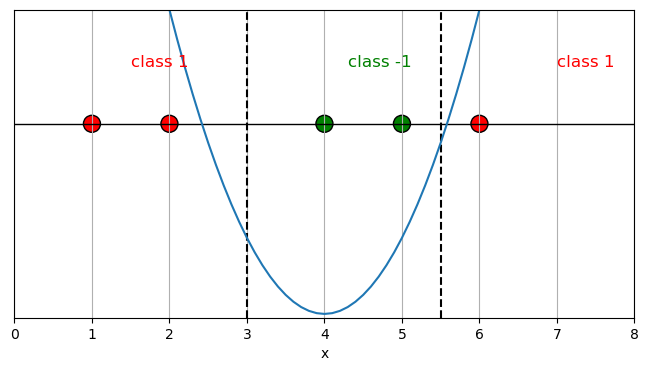

In [6]:
x = np.array([1, 2, 4, 5, 6])
class_labels = np.array([1, 1, 2, 2, 1])
y = class_labels - 3 + 3 *(class_labels == 1)

_, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, np.zeros_like(x), 
            c=np.where(class_labels == 1, 'red', 'green'), 
            s=150, 
            edgecolors='black', 
            marker='o')

ax.set_ylim(-1.7, 1)
ax.set_xlim(0, 8)
ax.set_xlabel('x')
ax.set_yticks([])

# Add text annotations
ax.text(1.5, 0.5, 'class 1', color='red', fontsize=12)
ax.text(4.3, 0.5, 'class -1', color='green', fontsize=12)
ax.text(7, 0.5, 'class 1', color='red', fontsize=12)

# Add grid
ax.grid(True)

# Add horizontal and vertical lines
ax.axhline(0, color='black', linewidth=1)
ax.axvline(3, color='black', linestyle='--')
ax.axvline(5.5, color='black', linestyle='--')
xT = np.arange(0, 7, 0.1)
ax.plot(xT, w2*xT**2 + w1*xT + wo)
# Show the plot
plt.show()

# Exercice II : Support Vector Machines and cross validation

In this exercise, we study the `checkerboard` simulated data set

**Question 1.** Make a toy example that looks like Figure 2. For that, you can use following script:

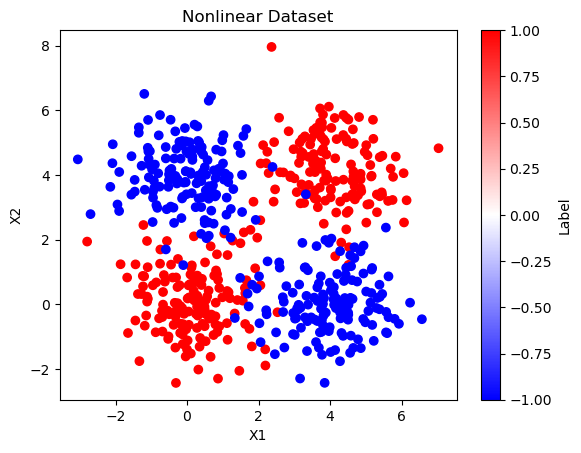

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal


np.random.seed(1)
def generate_dataset_nonlinear(n, p):
    # Generate the bottom-left points
    bottom_left = multivariate_normal(mean=np.zeros(p), cov=np.eye(p), size=n)
    
    # Generate the upper-right points
    upper_right = multivariate_normal(mean=np.full(p, 4), cov=np.eye(p), size=n)
    
    # Generate the upper-left points (adjusted for 2D case)
    upper_left = multivariate_normal(mean=[0, 4], cov=np.eye(p), size=n)
    
    # Generate the bottom-right points (adjusted for 2D case)
    bottom_right = multivariate_normal(mean=[4, 0], cov=np.eye(p), size=n)
    
    # Labels for the classes
    y = np.concatenate([np.ones(2 * n), -np.ones(2 * n)])
    
    # Combine the datasets and create a DataFrame
    x = np.vstack([bottom_left, upper_right, upper_left, bottom_right])
    data = pd.DataFrame(x, columns=[f"X{i+1}" for i in range(p)])
    data['y'] = y
    
    return data

# Generate the dataset
data = generate_dataset_nonlinear(150, 2)

# Plot the data
plt.scatter(data['X1'], data['X2'], c=data['y'], cmap='bwr', label=data['y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nonlinear Dataset')
plt.colorbar(label='Label')
plt.show()

## Question 2.
 Using the `createDataPartition` function of the `caret` package, create a train/test partition of your `checkerboard` simulated dataset.

### Answers:

In [8]:
from sklearn.model_selection import train_test_split
train_dataset,test_dataset=train_test_split(data,test_size=0.2,random_state=42)

## Question 3. 
 From the training set, train a nonlinear SVM combined with gaussian kernel\footnote{We recall that within the \texttt{kernlab} library, gaussian kernel is defined as:
\begin{equation}
k(\mathbf{x}_i, \mathbf{x}_j) = \text{exp}\bigg(- \sigma \Vert \mathbf{x}_i - \mathbf{x}_j \Vert^2\bigg)
\end{equation}
} with $\sigma = 1$ and the regularization parameter $C=1$. 

You can used the \texttt{kernlab:::ksvm()} function.

### Answers:

In [9]:
from sklearn.svm import SVC
kernel="rbf"#for gaussian
C=1
sigma=1
model=SVC(C=C,kernel=kernel,gamma=1/(2*sigma**2))


In [10]:
# train the model
model.fit(X=train_dataset[['X1','X2']],y=train_dataset['y'])

SVC(C=1, gamma=0.5)

## Question 4 
 Visualize the resulting SVM model (using `plot.ksvm()`). 

### Answers:

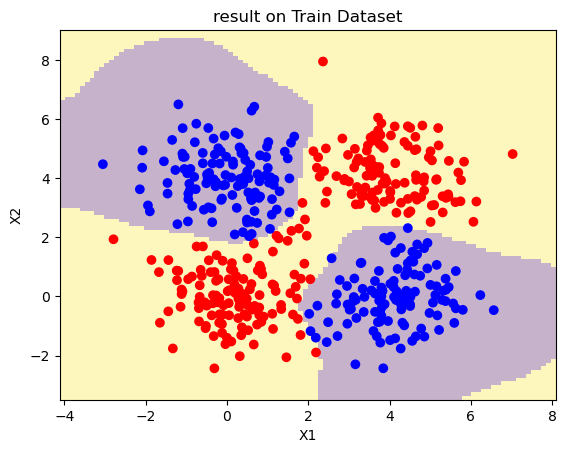

In [11]:
# Plot the data
from sklearn.inspection import DecisionBoundaryDisplay

def plot_dataset(dataset_plot, model, title=""):
    _, ax = plt.subplots()
    common_params = {"estimator": model, "X": dataset_plot[['X1','X2']], "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    ax.scatter(dataset_plot['X1'], dataset_plot['X2'], c=model.predict(dataset_plot[["X1","X2"]]), cmap='bwr', label=model)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(title)
    plt.show()
plot_dataset(dataset_plot=train_dataset, model=model, title="result on Train Dataset")

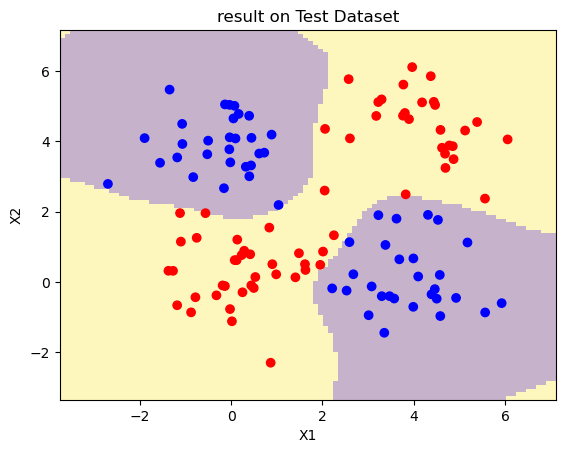

In [12]:
plot_dataset(test_dataset, model=model, title="result on Test Dataset")

## Question 5 : 
 For small value of $\sigma$, we can reduce the exponential function to its first-order Taylor approximation. In this case, prove that the SVM decision boundary is linear.

### Answers:

$k(\mathbf{x}_i, \mathbf{x}_j) = \text{exp}\bigg(- \sigma \Vert \mathbf{x}_i - \mathbf{x}_j \Vert^2\bigg)\simeq 1 - \sigma \Vert \mathbf{x}_i - \mathbf{x}_j \Vert^2$ to the order 1 of the Taylor expansion of $\exp(x)$ when $x\rightarrow 0$.

The boundary expression becomes:
$f(\mathbf{u}) = \mu^T\text{diag}(\mathbf{y})(1-\sigma(\mathbf{u}^T\mathbf{u} -2\mathbf{u}^T\mathbf{x}_i + \mathbf{x}_i^T\mathbf{x}_i))_{1\leq i\leq n} + b^*$.

For $\sigma\ll 1$, $1 - \sigma\mathbf{u}^T\mathbf{u} \simeq 1$, thus $f(\mathbf{u}) = \mu^T\text{diag}(\mathbf{y})(1-\sigma(-2\mathbf{u}^T\mathbf{x}_i + \mathbf{x}_i^T\mathbf{x}_i))_{1\leq i\leq n} + b^*$.

We recognize the expression of a linear boundary.

**Question 6.** Show the evolution of the cross-validated error rate as function of $C$ and $\sigma$. Deduce the optimal values $(C^*, \sigma^*)$ for $C$ and $\sigma$.

### Answers:

In [14]:
from sklearn.model_selection import StratifiedKFold

# Use KFold to avoid overfitting on the test_dataset defined earlier

C_int = range(1, 30)
sigma_int = range(1, 30)

errs = np.zeros((len(C_int), len(sigma_int)))
skf = StratifiedKFold(n_splits=3)
for i, c in enumerate(C_int):
    for j, sigma in enumerate(sigma_int):
        model = SVC(C=c, kernel=kernel, gamma=1 / (2 * sigma**2))
        for k, (train_index, test_index) in enumerate(
            skf.split(data[["X1", "X2"]], data["y"])
        ):
            Xtrain, ytrain, Xtest, ytest = (
                data.loc[train_index, ["X1", "X2"]],
                data.loc[train_index, "y"],
                data.loc[test_index, ["X1", "X2"]],
                data.loc[test_index, "y"],
            )
            model.fit(X=Xtrain, y=ytrain)
            pred = model.predict(Xtest)
            errs[i, j] += sum(pred != ytest.to_numpy()) / len(pred)
errs = pd.DataFrame(errs, index=C_int, columns=sigma_int)
cstar, sigma_star = errs.idxmin().iloc[0], errs.T.idxmin().iloc[0]

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lix\AppData\Local\Temp\ipykernel_1440\1611875766.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Heatmap of the error rate on 3-fold CV for the couple $(C, \sigma)$")
C:\Users\lix\AppData\Local\Temp\ipykernel_1440\1611875766.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("$\sigma$")


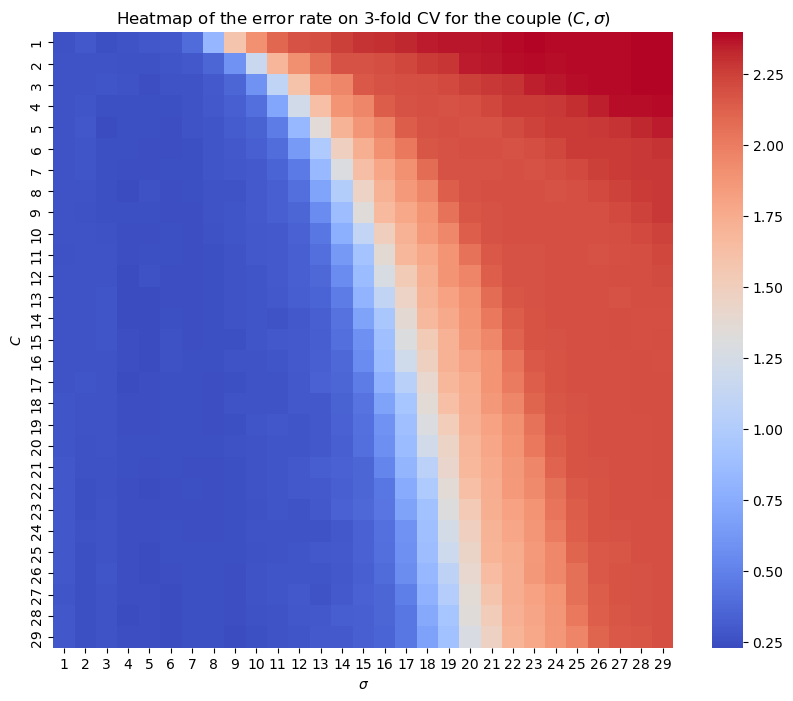

In [15]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(errs, cmap = 'coolwarm')
plt.title("Heatmap of the error rate on 3-fold CV for the couple $(C, \sigma)$")
plt.xlabel("$\sigma$")
plt.ylabel("$C$")
plt.show()

## Question 7 
 Build the optimal SVM model and evaluate this model on the test set. Report the test error rate.


### Answers:

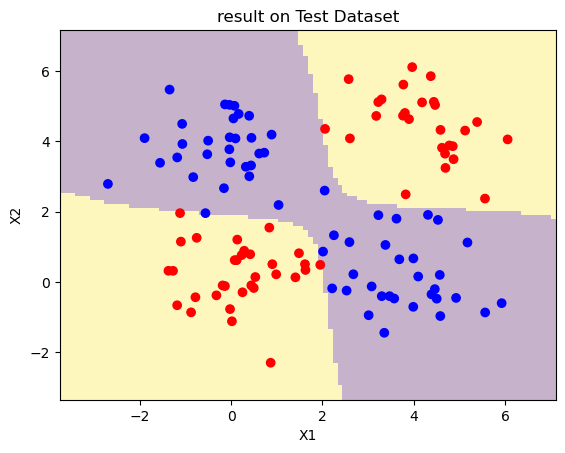

In [17]:
model = SVC(C=cstar, kernel=kernel, gamma=1 / (2 * sigma_star**2))
model.fit(X=train_dataset[["X1", "X2"]], y=train_dataset["y"])
plot_dataset(test_dataset, model=model, title="result on Test Dataset")

In [20]:
print("error rate:", sum(model.predict(test_dataset[["X1", "X2"]]) != test_dataset["y"]) / len(test_dataset))

error rate: 0.075



# Exercice III : Alzheimer or not?

You will find the `Alzheimer` dataset and the associated paper [@webster2009] on Edunao. This dataset contains gene expression measurements for 188 controls versus 176 patients with Alzheimer's disease. The goal is to predict the patient's status based on the expression of 8,650 genes.

## Question 1.
 use linear SVM to predict the patient's status from expression data. In particular, you will have to plot the evolution of the cross-validated classification error rate as a function of the model hyperparameter.

### Answers:

In [21]:
#put a linear SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
A = pd.read_table("Alzheimer_Webster.txt", header=0,sep=" ")
test_size=0.2
target="Y"


In [31]:
# list all hyperparameters to swipe 
Cs=np.logspace(-2.3,2.3,10)
Cs = np.logspace(-10, -1, 200)
#Cs=[10**i for i in range(-10,-5)]
fold=5 

In [29]:
from sklearn.model_selection import validation_curve
def get_result_C(Cs,kernel,whole_dataset,target,fold):
    #train_dataset,test_dataset=train_test_split(A,test_size=test_size,random_state=42)
    model=SVC(kernel=kernel)
    train_scores,test_scores=validation_curve(estimator=model,X=whole_dataset.drop(columns=[target]),y=whole_dataset[target],param_name="C",param_range=Cs,cv=fold,n_jobs=-1)

    df=pd.DataFrame()
    # fetch mean test and train score
    df["train_score"]=train_scores.mean(axis=1)
    df["test_score"]=test_scores.mean(axis=1)
    # add hyperparameters to the Dataframe
    df["C"]=Cs
    df["Kernel"]=kernel
    return df


In [32]:
# Compute for different C the models.
result_df=pd.DataFrame()
result_df_test=pd.DataFrame()
result_df=pd.concat([result_df,(get_result_C(Cs,"linear",whole_dataset=A,target=target,fold=5))])

Cs


Text(0, 0.5, 'Accuracy')

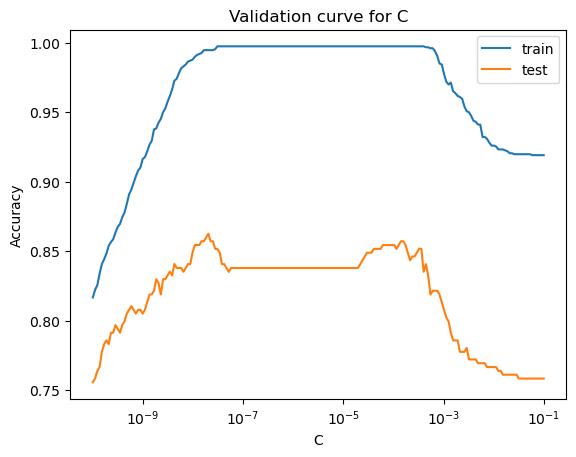

In [33]:
import seaborn as sns
sns.lineplot(data=result_df, x="C", y="train_score",label="train")
sns.lineplot(data=result_df, x="C", y="test_score",label="test")
plt.xscale('log')
plt.title("Validation curve for C")
plt.ylabel("Accuracy")


In [34]:
#find the best where the test score is the highest
best_C=result_df[result_df["test_score"]==result_df["test_score"].max()]["C"].values[0]
print("best C:",best_C) 
print(" best accuracy on test:",result_df["test_score"].max())

best C: 2.0255019392306666e-08
 best accuracy on test: 0.8625190258751901


on the 5/10 it was 2.0255019392306666e-08

## Question 2 . 
Using the `ConfusionMatrix` function of the `caret` package report the metrics that allow you to quantify the quality of the optimal model. Comment on it.

### Answers:

In [35]:
#our optimal model is C=10 
#best_C= 2.0255019392306666e-08
C=best_C
model=SVC(C=best_C,kernel="linear")
test_size=0.2
whole_dataset=A
train_dataset,test_dataset=train_test_split(A,test_size=test_size,random_state=42)
model.fit(train_dataset.drop(columns=[target]),train_dataset[target])
y_pred=model.predict(test_dataset.drop(columns=[target]))
accuracy_test=accuracy_score(y_pred,test_dataset[target])


Text(0.5, 1.0, 'confusion matrix with a usual test-split of 20%')

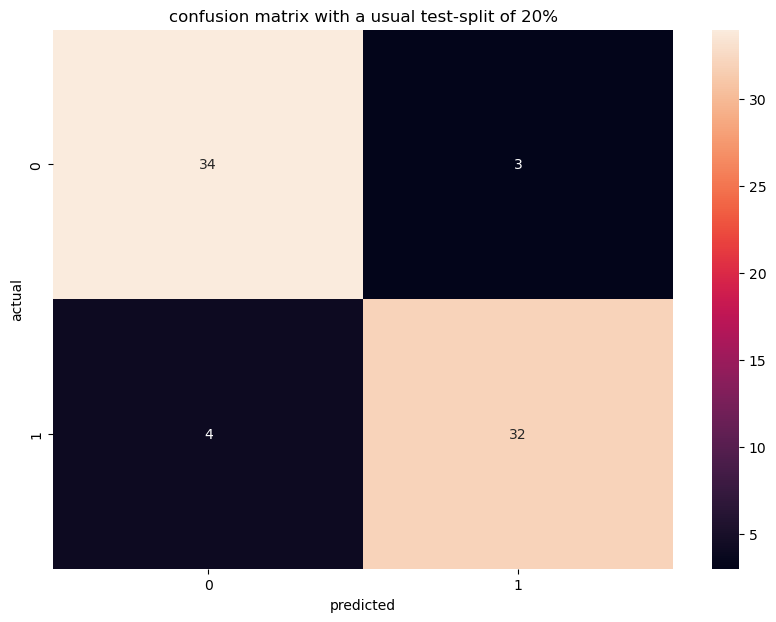

In [36]:
# Compute the Confusion Matrix
df_cm=confusion_matrix(y_pred,test_dataset[target])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix with a usual test-split of 20%")

Text(0.5, 1.0, '  Confusion matrix for the whole dataset with 5-fold cross-validation')

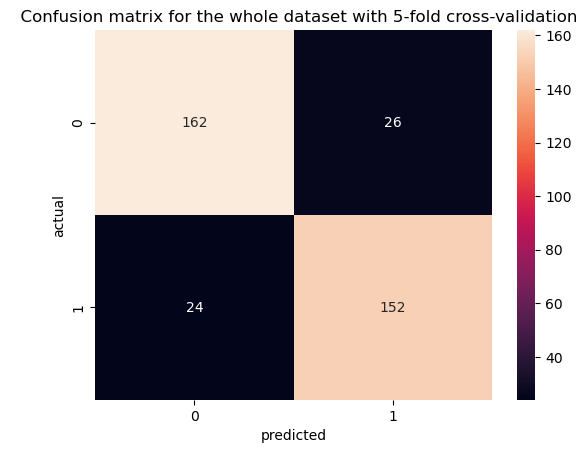

In [38]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model,whole_dataset.drop(columns=[target]),y=whole_dataset[target], cv=5)
conf_mat = confusion_matrix(whole_dataset[target], y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("  Confusion matrix for the whole dataset with 5-fold cross-validation")

In [105]:
conf_mat.diagonal()/conf_mat.sum(axis=1)

array([0.86170213, 0.86363636])

  
 #### Comment
The confusion matrix shows that the model performs well, but there are some misclassifications in both directions (false positives and false negatives). The slight imbalance between true positives and true negatives suggests that both classes are reasonably well-represented. We have an overall accuracy of 0.85% which seems quite nice.

## Bonus question 
 Can you improve the model with more sophisticated kernels?

### Answer:
We will compare the linear kernel with already implemented kernel such as poly , rbf and sigmoid. As the optimal C may differ from one kernel to another, we have to do a hyperparameter search

In [ ]:
#list of hyperparameters to swipe
Cs = np.array([10**i for i in range(-10,5)])

list_kernel=["linear", "poly", "rbf", "sigmoid"]

In [152]:
# Compte for every kernel and C the model.
result_df=pd.DataFrame()
for kernel in list_kernel:
    print("the kernel was",kernel)
    result_df=pd.concat([result_df,(get_result_C(Cs,kernel,whole_dataset=A,target=target,fold=5))])

the kernel was linear
[0.81662901 0.91688792 0.98763593 0.99725321 0.99725321 0.99725321
 0.99725321 0.9800852  0.92583675 0.91896625 0.91896625 0.91896625
 0.91896625 0.91896625 0.91896625]
the kernel was poly
[0.51648308 0.51648308 0.51648308 0.51648308 0.51648308 0.51648308
 0.51648308 0.52747023 0.57142117 0.64079932 0.75551005 0.87981688
 0.96359271 0.99656593 0.99725321]
the kernel was rbf
[0.51648308 0.51648308 0.51648308 0.51648308 0.51648308 0.51648308
 0.51648308 0.51648308 0.51648308 0.65797675 0.78366285 0.90109919
 0.99038507 0.99725321 0.99725321]
the kernel was sigmoid
[0.51648308 0.51648308 0.51648308 0.51648308 0.51648308 0.51648308
 0.51648308 0.51648308 0.51648308 0.51648308 0.57074566 0.53778656
 0.52679471 0.52748199 0.52748199]


In [168]:
# for C >1e5 linear doesn't output any solution, so we have to push only for other kernel
Cs = np.array([10**i for i in range(5,10)])

list_kernel=["linear", "poly", "rbf", "sigmoid"]
list_kernel=[ "poly", "rbf", "sigmoid"] #I couldn't push more for linear kernel because of the size of the dataset
for kernel in list_kernel:
    print("the kernel was",kernel)
    result_df=pd.concat([result_df,(get_result_C(Cs,kernel,whole_dataset=A,target=target,fold=5))])

the kernel was poly
[0.995881   0.99382149]
the kernel was rbf
[1. 1.]
the kernel was sigmoid
[0.52405028 0.52405028]


Text(0, 0.5, 'Accuracy')

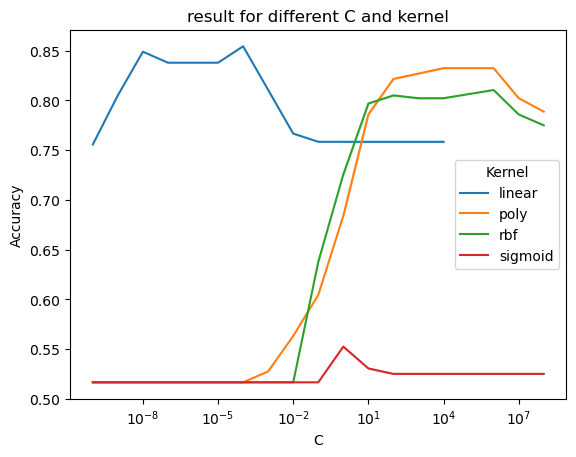

In [169]:
import seaborn as sns
#sns.lineplot(data=result_df, x="C", y="train_score",hue="Kernel")
sns.lineplot(data=result_df, x="C", y="test_score",hue="Kernel")
#set x scale to log
plt.xscale('log')
plt.title("result for different C and kernel on the test set with 5-fold cross validation")
plt.ylabel("Accuracy")


Overall we don't have any major improvements by the other kernels, so the linear kernel seems the best fit  
It is worth mentioning that algorithm are sometimes too slow and instead of giving some wrong output, the algorithm never ends. 
From a pratical point of view it is quite cumbersome.